In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from mpl_toolkits.mplot3d import Axes3D
import time

%matplotlib inline 

In [3]:
path_to_data = '/mnt/storage/HRV/data_atfer_Nekit_skripts/'
path_to_3d_signal = '/mnt/storage/HRV/3d-signal/'

In [4]:
files = os.listdir(path_to_3d_signal)

In [54]:
start = time.clock()

for file_i, file_ in enumerate(files[:]):
    print (file_i, file_)
    if os.path.isfile(path_to_data + "code_string/" + file_[:-4] + '.txt'):
        print ('find code for', file_)
        continue
    with open(path_to_data + 'filtered/' + file_[:-4] + '_filtered' + file_[-4:], 'rb') as f: 
        data = np.fromfile(f, np.int16) 
    
    path_to_markup = path_to_data + 'markup/' + file_[:-4] + '_filtered_markup.csv'
    if os.path.isfile(path_to_markup):
        markup = np.loadtxt(path_to_markup)
    else:
        #print ('can\'t find markup for', file_)
        continue

    
    T = markup[1:] - markup[:-1]
    R = []
    for i in markup:
        for j in range(200):
            if (np.hstack((data[i-j+1:i-j+3] > data[i-j], data[i-j-2:i-j] >= data[i-j]))).all():
                if data[i]-data[i-j] < 10:
                    continue
                R.append(data[i]-data[i-j])
                break
        if j == 199:
#             print ('bad markup', i)
            R.append(0)
#             R.append(data[i]-min(data[i-j:i]))
    print (len(markup))
    
    
    R = np.array(R[:-1])
    iSelected = T > 100
    R = R[iSelected]
    T = T[iSelected]
    print (len(T))

    iSelected = R > 0
    R = R[iSelected]
    T = T[iSelected]
    print (len(T))
    
    np.save(path_to_data + 'R-T_code/' + file_[:-4], np.vstack((R, T)))

    
    a = np.arctan(R/T)
    dT = T[1:] - T[:-1]
    dR = R[1:] - R[:-1]
    da = a[1:] - a[:-1]
    trigram = []
    for i, dt in enumerate(dT):
        if R[i] <= 0 or R[i+1] <= 0:
            print ('RRRRRRRrR', i, R[i], markup[i], T[i])
            continue
        elif dt > 0 and dR[i] > 0 and da[i] > 0:
            trigram.append('A')
        elif dt <= 0 and dR[i] <= 0 and da[i] > 0:
            trigram.append('B')
        elif dt <=0 and dR[i] > 0 and da[i] > 0:
            trigram.append('C')
        elif dt > 0 and dR[i] <= 0 and da[i] <= 0:
            trigram.append('D')
        elif dt > 0 and dR[i] > 0 and da[i] <= 0:
            trigram.append('E')
        elif dt <= 0 and dR[i] <= 0 and da[i] <= 0:
            trigram.append('F')
        elif T[i] ==  0 or T[i+1] == 0:
            continue
        else:
            print ('ups...', i, 'dt', dt, 'dR', dR[i], 'da', da[i])

    fld = open(path_to_data + "code_string/" + file_[:-4] + '.txt', "w")
    fld.write(''.join(trigram))
    fld.close()
        
print ('time', time.clock() - start, len (files), 'files')

0 310240.A53
find code for 310240.A53
1 412316.A53
find code for 412316.A53
2 510901.A53
find code for 510901.A53
3 110270.A53
find code for 110270.A53
4 110280.A53
find code for 110280.A53
5 110303.A53
find code for 110303.A53
6 110307.A53
find code for 110307.A53
7 110314.A53
find code for 110314.A53
8 110318.A53
find code for 110318.A53
9 110357.A53
find code for 110357.A53
10 110477.A53
find code for 110477.A53
11 110520.A53
find code for 110520.A53
12 110552.153
find code for 110552.153
13 110579.A53
find code for 110579.A53
14 110664.A53
find code for 110664.A53
15 110700.A52
find code for 110700.A52
16 110723.A53
find code for 110723.A53
17 110760.A53
find code for 110760.A53
18 110784.A53
find code for 110784.A53
19 110788.A52
find code for 110788.A52
20 110797.A53
find code for 110797.A53
21 110806.A53
find code for 110806.A53
22 221380.A53
find code for 221380.A53
23 221381.A53
find code for 221381.A53
24 221382.A52
find code for 221382.A52
25 221383.A52
find code for 221383.

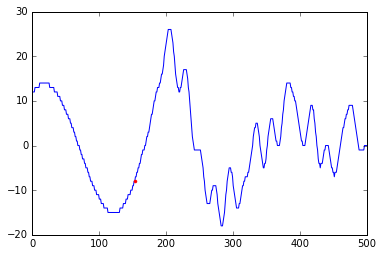

In [48]:
#смотреть ошибки разметки - разкоментировать строку 29 выше. 

plt.plot(data[13184000:13184500])
plt.plot(13184153-13184000, data[13184153], '.', c = 'r')
# plt.plot(75264346.0-75264000, data[75264346.0], '.', c = 'r')
# plt.plot(75264959.0-75264000, data[75264959.0], '.', c = 'r')

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


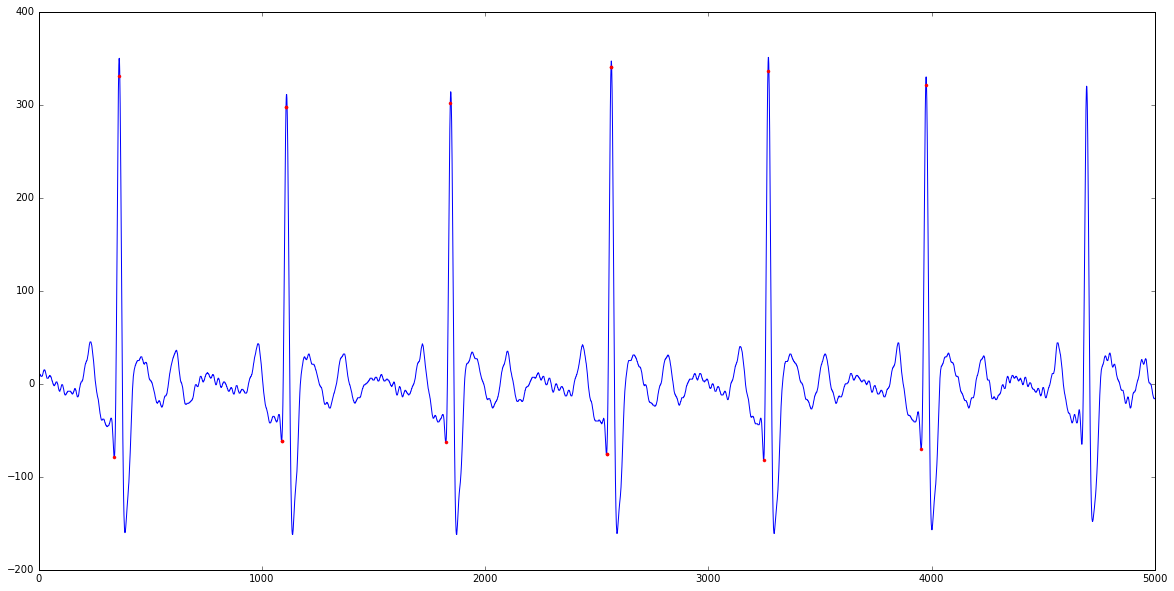

In [43]:
#смотреть как ищется минимум для подсчета R

plt.rcParams['figure.figsize'] = (20,10)

begin = 5000
end = 5000*2

plt.plot(data[begin:end])

for i in markup[int(begin/600):int(end/600)]:
    plt.plot(i - begin, data[i], '.', c = 'r')
    for j in range(50):
#         print (data[i-j-2:i-j+3, 0])
        if (np.hstack((data[i-j+1:i-j+3] >= data[i-j], data[i-j-2:i-j] >= data[i-j]))).all():
#             print (data[i-j-2:i-j+3, 0])
            break
    index_may_be = i-j
    plt.plot(index_may_be-begin, data[index_may_be], '.', c = 'r')
plt.show()